In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
dictionary = {'OUTLOOK': ['Rainy', 'Rainy',
                          'Overcast', np.nan,
                          'Sunny', 'Sunny',
                          'Overcast', 'Rainy',
                          'Rainy', 'Sunny',
                          np.nan, 'Overcast',
                          'Overcast', 'Sunny'],
              'TEMPERATURE': ['Hot', 'Hot', 'Hot',
                              'Mild', 'Cool',
                              'Cool', 'Cool',
                              np.nan, 'Cool',
                              'Mild', 'Mild',
                              'Mild', 'Hot', 'Mild'],
              'HUMIDITY': ['High', 'High', 'High',
                           'High', 'Normal', 'Normal',
                           'Normal', 'High', 'Normal',
                           'Normal', 'Normal', 'High',
                           'Normal', np.nan],
              'WINDY': ['No', 'Yes', 'No', 'No', 'No',
                        'Yes', 'Yes', 'No', 'No',
                        'No', np.nan, 'Yes', np.nan,
                        'Yes']}

In [7]:
df=pd.DataFrame(dictionary)
df

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY
0,Rainy,Hot,High,No
1,Rainy,Hot,High,Yes
2,Overcast,Hot,High,No
3,NaN,Mild,High,No
4,Sunny,Cool,Normal,No
5,Sunny,Cool,Normal,Yes
6,Overcast,Cool,Normal,Yes
7,Rainy,NaN,High,No
8,Rainy,Cool,Normal,No
9,Sunny,Mild,Normal,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OUTLOOK      12 non-null     object
 1   TEMPERATURE  13 non-null     object
 2   HUMIDITY     13 non-null     object
 3   WINDY        12 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [9]:
df.isnull().sum()

OUTLOOK        2
TEMPERATURE    1
HUMIDITY       1
WINDY          2
dtype: int64

In [10]:
m_o=df['OUTLOOK'].mode()
m_t=df['TEMPERATURE'].mode()
m_h=df['HUMIDITY'].mode()
m_w=df['WINDY'].mode()

In [11]:
print(m_o)
print(m_t)
print(m_h)
print(m_w)

0    Overcast
1       Rainy
2       Sunny
dtype: object
0    Mild
dtype: object
0    Normal
dtype: object
0    No
dtype: object


In [12]:
df['OUTLOOK'].fillna('Overcast', inplace=True)        #filling with any constand as freq of all constant is same
df['TEMPERATURE'].fillna(m_t[0],inplace=True)
df['HUMIDITY'].fillna(m_h[0],inplace=True)
df['WINDY'].fillna(m_w[0],inplace=True)

In [13]:
df

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY
0,Rainy,Hot,High,No
1,Rainy,Hot,High,Yes
2,Overcast,Hot,High,No
3,Overcast,Mild,High,No
4,Sunny,Cool,Normal,No
5,Sunny,Cool,Normal,Yes
6,Overcast,Cool,Normal,Yes
7,Rainy,Mild,High,No
8,Rainy,Cool,Normal,No
9,Sunny,Mild,Normal,No


In [14]:
w_s=[34.7,45.2,40.3,23.6,34.8,56.8,23.7,12.7,34.5,67.8,45.4,89.4,38.9,69.5]


In [15]:
df['WIND SPEED']=w_s           #adding new col
df

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,WIND SPEED
0,Rainy,Hot,High,No,34.7
1,Rainy,Hot,High,Yes,45.2
2,Overcast,Hot,High,No,40.3
3,Overcast,Mild,High,No,23.6
4,Sunny,Cool,Normal,No,34.8
5,Sunny,Cool,Normal,Yes,56.8
6,Overcast,Cool,Normal,Yes,23.7
7,Rainy,Mild,High,No,12.7
8,Rainy,Cool,Normal,No,34.5
9,Sunny,Mild,Normal,No,67.8


C:\Users\gverm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


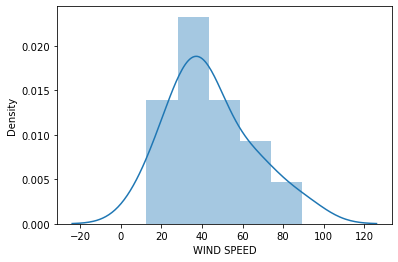

In [16]:
#VISUALIZATION
# type of windspeed: continuous, histograms,kde,distplot

sns.distplot(df['WIND SPEED']);

C:\Users\gverm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


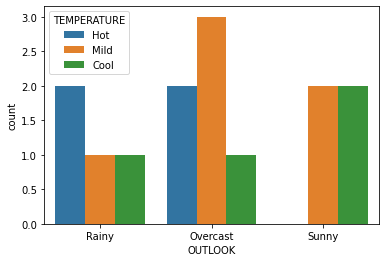

In [17]:
# Countplot
sns.countplot(df['OUTLOOK'], hue=df['TEMPERATURE']);

In [18]:
#CATEGORICAL TO NUMERICAL DATA
# Label encoder in OUTLOOK and HUMIDITY

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['OUTLOOK']=le.fit_transform(df['OUTLOOK'])
df['HUMIDITY']=le.fit_transform(df['HUMIDITY'])

In [29]:
df

,Cool,Hot,Mild
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0
5,1,0,0
6,1,0,0
7,0,0,1
8,1,0,0
9,0,0,1


In [30]:
df2=pd.get_dummies(df, columns= ['WINDY','TEMPERATURE'])
df2

KeyError: "None of [Index(['WINDY', 'TEMPERATURE'], dtype='object')] are in the [columns]"